**OBJECTIVE:**

*We are trying to find out if we can get a color that significantly improves the ad-click rate in this project. We will discover whether doing this is even possible and whether the enormous amout of data we have is of any use to us or not.*

First we need to get the csv file to work with.

In [72]:
from google.colab import files
uploaded = files.upload()

Saving colored_ad_click_table.csv to colored_ad_click_table (4).csv


We need to import all the necessary modules we are going to use in this project.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We will not put the csv file in a dataframe which we are going to work with.

In [74]:
df = pd.read_csv('colored_ad_click_table.csv')

In [75]:
num_rows,	num_cols	=	df.shape
print(f"Table contains {num_rows} rows and {num_cols} columns")

Table contains 30 rows and 41 columns


We need to check for certain values necessary to conduct this study of ours.

In [76]:
df.columns

Index(['Color', 'Click Count: Day 1', 'View Count: Day 1',
       'Click Count: Day 2', 'View Count: Day 2', 'Click Count: Day 3',
       'View Count: Day 3', 'Click Count: Day 4', 'View Count: Day 4',
       'Click Count: Day 5', 'View Count: Day 5', 'Click Count: Day 6',
       'View Count: Day 6', 'Click Count: Day 7', 'View Count: Day 7',
       'Click Count: Day 8', 'View Count: Day 8', 'Click Count: Day 9',
       'View Count: Day 9', 'Click Count: Day 10', 'View Count: Day 10',
       'Click Count: Day 11', 'View Count: Day 11', 'Click Count: Day 12',
       'View Count: Day 12', 'Click Count: Day 13', 'View Count: Day 13',
       'Click Count: Day 14', 'View Count: Day 14', 'Click Count: Day 15',
       'View Count: Day 15', 'Click Count: Day 16', 'View Count: Day 16',
       'Click Count: Day 17', 'View Count: Day 17', 'Click Count: Day 18',
       'View Count: Day 18', 'Click Count: Day 19', 'View Count: Day 19',
       'Click Count: Day 20', 'View Count: Day 20'],
      dtyp

In [77]:
df.Color.values

array(['Pink', 'Gray', 'Sapphire', 'Purple', 'Coral', 'Olive', 'Navy',
       'Maroon', 'Teal', 'Cyan', 'Orange', 'Black', 'Tan', 'Red', 'Blue',
       'Brown', 'Turquoise', 'Indigo', 'Gold', 'Jade', 'Ultramarine',
       'Yellow', 'Virdian', 'Violet', 'Green', 'Aquamarine', 'Magenta',
       'Silver', 'Bronze', 'Lime'], dtype=object)

Day 1 is summerized below.

In [78]:
selected_columns = ['Color', 'Click Count: Day 1', 'View Count: Day 1']
print(df[selected_columns].describe())

       Click Count: Day 1  View Count: Day 1
count           30.000000               30.0
mean            23.533333              100.0
std              7.454382                0.0
min             12.000000              100.0
25%             19.250000              100.0
50%             24.000000              100.0
75%             26.750000              100.0
max             49.000000              100.0


We will now check if every daily view(s) is 100, and if it is, then we drop all the daily views columns to irradicate unnecessary calculations.

In [79]:
view_columns = [column for column in df.columns if 'View' in column]
assert np.all(df[view_columns].values == 100)

In [80]:
df.drop(columns=view_columns, inplace=True)
df.columns

Index(['Color', 'Click Count: Day 1', 'Click Count: Day 2',
       'Click Count: Day 3', 'Click Count: Day 4', 'Click Count: Day 5',
       'Click Count: Day 6', 'Click Count: Day 7', 'Click Count: Day 8',
       'Click Count: Day 9', 'Click Count: Day 10', 'Click Count: Day 11',
       'Click Count: Day 12', 'Click Count: Day 13', 'Click Count: Day 14',
       'Click Count: Day 15', 'Click Count: Day 16', 'Click Count: Day 17',
       'Click Count: Day 18', 'Click Count: Day 19', 'Click Count: Day 20'],
      dtype='object')

We are taking blue as our default value and we will consider it against 29 different colors.

In [81]:
df.set_index('Color',	inplace=True)
df.T.Blue.describe()

,Blue
count,20.000000
mean,28.350000
std,5.499043
min,18.000000
25%,25.750000
50%,27.500000
75%,30.250000
max,42.000000


Below is the creation of a table without the blue values.

In [83]:
df_not_blue = df.T.drop(columns='Blue')
print(df_not_blue.head(2))

Color               Pink  Gray  Sapphire  Purple  Coral  Olive  Navy  Maroon  \
Click Count: Day 1    21    27        30      26     26     26    38      21   
Click Count: Day 2    20    27        32      21     24     19    29      29   

Color               Teal  Cyan  ...  Ultramarine  Yellow  Virdian  Violet  \
Click Count: Day 1    25    24  ...           49      14       27      15   
Click Count: Day 2    25    22  ...           41      24       23      22   

Color               Green  Aquamarine  Magenta  Silver  Bronze  Lime  
Click Count: Day 1     14          24       18      26      19    20  
Click Count: Day 2     25          28       21      24      19    19  

[2 rows x 29 columns]


We'll run a permutation test between blue and the other 29 colors. Then we'll sort these colors based on their p-value results. My outputs are visualized as a heatmap , to better emphasize the differences between p-values.

In [84]:
def	permutation_test(array_a,	array_b):
  mean_a = array_a.mean()
  mean_b = array_b.mean()
  extreme_mean_diff = abs(mean_a - mean_b)
  total_data = np.hstack([array_a, array_b])
  number_extreme_values = 0.0
  for _ in range(30000):
    np.random.shuffle(total_data)
    sample_a = total_data[:array_a.size]
    sample_b = total_data[array_a.size:]
    if abs(sample_a.mean() - sample_b.mean()) >= extreme_mean_diff:
      number_extreme_values += 1
  p_value = number_extreme_values / 30000
  return p_value

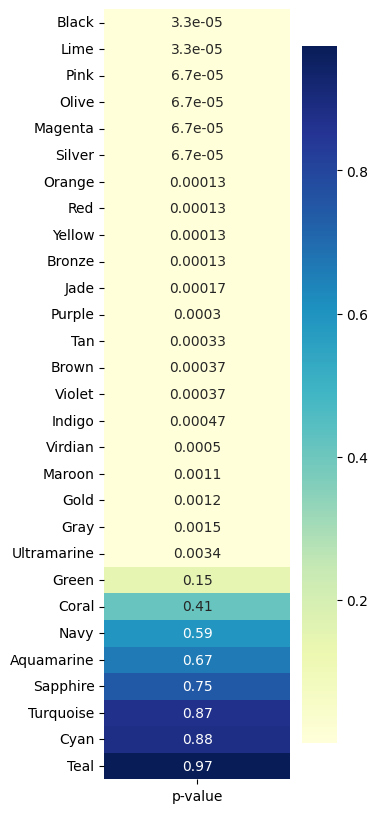

In [85]:
np.random.seed(0)
blue_clicks = df.T.Blue.values
color_to_p_value = {}
for color, color_clicks in df_not_blue.items():
  p_value	=	permutation_test(blue_clicks,	color_clicks)
  color_to_p_value[color]	=	p_value
sorted_colors, sorted_p_values = zip(*sorted(color_to_p_value.items(),key=lambda	x: x[1]))
plt.figure(figsize=(3, 10))
sns.heatmap([[p_value] for p_value in sorted_p_values],
												cmap='YlGnBu',	annot=True,	xticklabels=['p-value'],
												yticklabels=sorted_colors)
plt.show()

Finding the mean click rate of black below.

In [86]:
mean_black = df_not_blue.Black.mean()
print(f"Mean click-rate of black is {mean_black}")

Mean click-rate of black is 21.6


Now we will filter out inferior colors to blue based on click rate of these colors. After doing this, we will end up with colors more attractive than blue for ads.

In [87]:
remaining_colors = df[df.T.mean().values > blue_clicks.mean()].index
size = remaining_colors.size
print(f"{size} colors have on average more clicks than Blue.")
print("These colors are:")
print(remaining_colors.values)

5 colors have on average more clicks than Blue.
These colors are:
['Sapphire' 'Navy' 'Teal' 'Ultramarine' 'Aquamarine']


In [88]:
for color, p_value in sorted(color_to_p_value.items(), key=lambda x: x[1]):
  if color in remaining_colors:
    mean = df_not_blue[color].mean()
    print(f"{color} has a p-value of {p_value} and a mean of {mean}")

Ultramarine has a p-value of 0.0034 and a mean of 34.2
Navy has a p-value of 0.5911666666666666 and a mean of 29.3
Aquamarine has a p-value of 0.6654666666666667 and a mean of 29.2
Sapphire has a p-value of 0.7457666666666667 and a mean of 28.9
Teal has a p-value of 0.9745 and a mean of 28.45


Four of the colors have large	p-values.	Only one color has a p-value that's small. That	color	is ultramarine:	a	special	shade	of blue. Its mean	of 34.2	is	greater	than blue's	mean of	28.35. Ultramarine's p-value is	0.0034.	It's more	than 10	times	lower	than the standard	significance level of	0.05.	However,	that significance	level	does not take	into account our
comparisons between blue	and	29 other colors. Each	comparison is	an
experiment testing whether a color differs from	blue.	If we	run
enough experiments, then we	are	guaranteed to	encounter	a	low	p-value	sooner	or later.	The	best way to	correct	for	this is	to execute a
Bonferroni correction; otherwise,	we will	fall victim	to p-value hacking.	To	carry	out	a	Bonferroni correction, we	lower	the	significance
level	to 0.05	/	29.

In [89]:
#Bonferroni correction
significance_level = 0.05 / 29
print(f"Adjusted significance level is {significance_level}")
if color_to_p_value['Ultramarine'] <= significance_level:
  print("Our p-value is statistically	significant")
else:
  print("Our p-value is not statistically significant")

Adjusted significance level is 0.001724137931034483
Our p-value is not statistically significant


In [90]:
hypothetical_sig_level = 0.05 / 5
print(f"Hypothetical significance level is {hypothetical_sig_level}")
if color_to_p_value['Ultramarine'] <= hypothetical_sig_level:
  print("Our hypothetical p-value would have been statistically significant")
else:
  print("Our hypothetical p-value would not have been statistically significant")

Hypothetical significance level is 0.01
Our hypothetical p-value would have been statistically significant


*SUMMARY:*

1.   More data isn't always better.
2.   Running a pointless surplus of analytic tests increases the chance of anomalous results. It's worth taking the time to think about a problem before running an analysis. If we had carefully considered the 30 colors, we would have realized that it was pointless to test them all. Many colors make ugly links. Colors like black are very unlikely to yield more clicks than blue. Filtering the color set would have led to a more informative test.
3. Even though our experiment was flawed, we still managed to extract a useful insight. Ultramarine might prove to be a reasonable substitute for blue, though more testing is required. Occasionally, data scientists are presented with flawed data, but good insights may still be possible.